In [1]:
import pandas as pd
from datetime import datetime
#from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from models_project import LogisticRegressionModel, RandomForestModel, XGBoostModel, NaiveBayesModel, DecisionTreeModel, AdaBoostModel
from visualization_features import get_feature_importance, plot_feature_importance, evaluate_model

In [2]:
df = pd.read_excel('data_final_res.xlsx')
    
date_columns = ['Дата публикации', 
                   'Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ',
                   'Дата начала подачи заявок / Дата начала исполнения контракта / Дата публикации ППГ',
                   'Дата окончания проведения торгов']
    
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

In [3]:
print("Уникальные значения в столбце 'Регион поставки':")
print(df['Регион поставки'].unique())

Уникальные значения в столбце 'Регион поставки':
['Курганская область' 'Санкт-Петербург'
 'Ямало-Ненецкий автономный округ (Тюменская область)' 'Москва'
 'Волгоградская область' 'Ростовская область' 'Самарская область'
 'Алтайский край' 'Омская область' 'Республика Башкортостан'
 'Вологодская область' 'Брянская область' 'Республика Бурятия'
 'Республика Крым' 'Владимирская область' 'Саратовская область'
 'Тюменская область' 'Республика Марий Эл' 'Челябинская область'
 'Республика Татарстан (Татарстан)'
 'Ханты-Мансийский автономный округ - Югра (Тюменская область)'
 'Кемеровская область - Кузбасс' 'Ленинградская область'
 'Архангельская область' 'Калужская область' 'Тамбовская область'
 'Хабаровский край' 'Ставропольский край' 'Краснодарский край'
 'Ярославская область' 'Кировская область' 'Республика Коми'
 'Калининградская область' 'Красноярский край' 'Республика Саха (Якутия)'
 'Приморский край' 'Костромская область' 'Нижегородская область'
 'Амурская область' 'Тверская область' 'Но

In [3]:
def clean_region_data(region):
    if pd.isna(region):
        return region
        
    if ';' in region:
        region = region.split(';')[0].strip()
    
    if '(' in region:
        region = region.split('(')[0].strip()
        
    return region

df['Регион поставки'] = df['Регион поставки'].apply(clean_region_data)

print("Уникальные значения после очистки:")
print(sorted(df['Регион поставки'].unique()))

Уникальные значения после очистки:
['Алтайский край', 'Амурская область', 'Архангельская область', 'Астраханская область', 'Байконур', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Вологодская область', 'Воронежская область', 'Донецкая Народная Республика', 'Еврейская автономная область', 'Забайкальский край', 'Ивановская область', 'Иркутская область', 'Кабардино-Балкарская Республика', 'Калининградская область', 'Калужская область', 'Камчатский край', 'Карачаево-Черкесская Республика', 'Кемеровская область - Кузбасс', 'Кировская область', 'Костромская область', 'Краснодарский край', 'Красноярский край', 'Курганская область', 'Курская область', 'Ленинградская область', 'Липецкая область', 'Магаданская область', 'Москва', 'Московская область', 'Мурманская область', 'Ненецкий автономный округ', 'Нижегородская область', 'Новгородская область', 'Новосибирская область', 'Омская область', 'Оренбургская область', 'Орловская область', 'Пензенская

In [3]:
df.head()

,Уровень,Заказчик,ИНН заказчика,Стоимость(руб.) Заказчик,Реестровый номер публикации,Идентификационный код закупки,Сфера деятельности,Регион поставки,Город поставки,Дата публикации,...,Дата окончания проведения торгов,Поставщик,ИНН поставщика,Победитель,Статус допуска,"Снижение на торгах,%",Форма публикации,Тип торгов,РНП сейчас,РНП ранее
0,2,АДМИНИСТРАЦИЯ ВАРГАШИНСКОГО РАЙОНА,4505003804,99875.00,143300049220000000,20-34505003804450501001-0011-003-1712-244,[ОКПД2 17.12] Бумага и картон,Курганская область,Варгашинский район,2020-01-20 13:17:13,...,2020-01-29 00:00:00,Кожина Алла Владимировна,450100192605,Победитель,Допущен,0.100001,Торговая процедура,NaN,0,0
1,2,ГБОУ ШКОЛА № 292 ФРУНЗЕНСКОГО РАЙОНА САНКТ-ПЕТ...,7816165190,47237.32,372200177920000000,20-27816165190781601001-0002-001-0000-000,[ОКПД2 95.11] Услуги по ремонту компьютеров и ...,Санкт-Петербург,Санкт-Петербург,2020-01-22 17:07:46,...,2020-02-03 00:00:00,"ООО ""ФОРПРИНТИНГ""",7825449897,NaN,Допущен,0.005024,Торговая процедура,NaN,0,0
2,1,"МАУК ""ЦБС""",8902012760,476024.04,32211104938,NaN,[ОКПД2 35.30] Услуги по снабжению паром и конд...,Ямало-Ненецкий автономный округ (Тюменская обл...,Ямало-Ненецкий автономный округ (Тюменская обл...,2022-02-06 23:57:13,...,2022-01-31 00:00:00,"АО ""ХАРП-ЭНЕРГО-ГАЗ""",8901016850,Победитель,Допущен,0.000000,Торговая процедура,Закупка у единственного поставщика (исполнител...,0,0
3,2,"ГБУЗ ""ГКБ ИМ. Ф.И. ИНОЗЕМЦЕВА ДЗМ""",7719046800,2511875.00,373200052320000000,20-27719046800771901001-0010-001-0000-000,[ОКПД2 32.50] Инструменты и оборудование медиц...,Москва,Москва,2020-01-15 16:57:11,...,2020-01-24 00:00:00,Сухачев Александр Анатольевич,343519815501,Победитель,Допущен,0.010000,Торговая процедура,NaN,0,0
4,1,"ГАУ ВО ""МОЙ БИЗНЕС""",3435901976,571000.00,32211612062,NaN,[ОКПД2 71.12] Услуги в области инженерно-техни...,Волгоградская область,Волгоградская область,2022-08-10 16:05:14,...,2022-08-10 11:30:00,"ООО ""ДЕФЕКТАЦИЯ""",3445030277,Победитель,Допущен,0.036778,Торговая процедура,Закупка у единственного поставщика (исполнител...,0,0


In [4]:
df.shape

(109891, 22)

In [4]:
df['Год'] = df['Дата публикации'].dt.year
df['Месяц'] = df['Дата публикации'].dt.month

train_data = df[df['Год'].isin(range(2019, 2024))]
test_data = df[df['Год'].isin(range(2024, 2026))]

# НОВЫЕ ПРИЗНАКИ

df['Процент побед'] = train_data.groupby(['ИНН поставщика'])['Победитель'].transform(lambda x: (x == 'Победитель').sum() / len(x))

df['Кол-во участий по региону'] = train_data.groupby(['ИНН поставщика', 'Регион поставки'])['Победитель'].transform('count')
df['Кол-во побед по региону'] = train_data.groupby(['ИНН поставщика', 'Регион поставки'])['Победитель'].transform(lambda x: (x == 'Победитель').sum())
df['Процент побед по региону'] = df['Кол-во побед по региону'] / df['Кол-во участий по региону']

df['Кол-во участий по заказчику'] = train_data.groupby(['ИНН поставщика', 'Заказчик'])['Победитель'].transform('count')
df['Кол-во побед по заказчику'] = train_data.groupby(['ИНН поставщика', 'Заказчик'])['Победитель'].transform(lambda x: (x == 'Победитель').sum())
df['Процент побед по заказчику'] = df['Кол-во побед по заказчику'] / df['Кол-во участий по заказчику']

df['Кол-во участий по сфере'] = train_data.groupby(['ИНН поставщика', 'Сфера деятельности'])['Победитель'].transform('count')
df['Кол-во побед по сфере'] = train_data.groupby(['ИНН поставщика', 'Сфера деятельности'])['Победитель'].transform(lambda x: (x == 'Победитель').sum())
df['Процент побед по сфере'] = df['Кол-во побед по сфере'] / df['Кол-во участий по сфере']

df['Общее кол-во участий'] = train_data.groupby('ИНН поставщика')['Победитель'].transform('count')
df['Общее кол-во побед'] = train_data.groupby('ИНН поставщика')['Победитель'].transform(lambda x: (x == 'Победитель').sum())

df['Среднее снижение цены'] = train_data.groupby('ИНН поставщика')['Снижение на торгах,%'].transform('mean')

#df['Последняя дата публикации'] = df.groupby("ИНН поставщика")["Дата публикации"].transform("max")
#df['Последняя дата публикации'] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

In [98]:
df.columns

Index(['Уровень', 'Заказчик', 'ИНН заказчика', 'Стоимость(руб.) Заказчик',
       'Реестровый номер публикации', 'Идентификационный код закупки',
       'Сфера деятельности', 'Регион поставки', 'Город поставки',
       'Дата публикации',
       'Дата окончания приема заявок / Дата планового окончания исполнения контракта / Плановая дата публикации лота по ППГ',
       'Дата начала подачи заявок / Дата начала исполнения контракта / Дата публикации ППГ',
       'Дата окончания проведения торгов', 'Поставщик', 'ИНН поставщика',
       'Победитель', 'Статус допуска', 'Снижение на торгах,%',
       'Форма публикации', 'Тип торгов', 'РНП сейчас', 'РНП ранее', 'Год',
       'Месяц', 'Процент побед', 'Кол-во участий по региону',
       'Кол-во побед по региону', 'Процент побед по региону',
       'Кол-во участий по заказчику', 'Кол-во побед по заказчику',
       'Процент побед по заказчику', 'Кол-во участий по сфере',
       'Кол-во побед по сфере', 'Процент побед по сфере',
       'Общее кол-

In [ ]:
df['Target'] = (df['Победитель'] == 'Победитель').astype(int)

numerical_features = [
    'Процент побед', 'Кол-во участий по региону', 'Кол-во побед по региону',
    'Процент побед по региону', 'Кол-во участий по заказчику', 'Кол-во побед по заказчику',
    'Процент побед по заказчику', 'Кол-во участий по сфере', 'Кол-во побед по сфере',
    'Процент побед по сфере', 'Общее кол-во участий', 'Общее кол-во побед',
    'Среднее снижение цены', 'Стоимость(руб.) Заказчик'
]

categorical_features = [
    'Уровень', 'Регион поставки',
    'Сфера деятельности', 
    'Форма публикации',
    'Тип торгов', 
    'РНП сейчас', 
    'РНП ранее'
]

time_features = ['Год', 'Месяц']

train_data = df[df['Год'].isin(range(2019, 2024))]
test_data = df[df['Год'].isin(range(2024, 2026))]

feature_columns = numerical_features + categorical_features + time_features

X_train = train_data[feature_columns].copy()
y_train = train_data['Target']
X_test = test_data[feature_columns].copy()
y_test = test_data['Target']

def preprocess_categorical_features(train_data, test_data, categorical_features, min_frequency=0.001):
    processed_train = train_data.copy()
    processed_test = test_data.copy()
    
    all_data = pd.concat([processed_train[categorical_features], processed_test[categorical_features]])
    
    for feature in categorical_features:
        value_counts = all_data[feature].value_counts(normalize=True)
        rare_categories = value_counts[value_counts < min_frequency].index
        
        processed_train[feature] = processed_train[feature].apply(lambda x: 'Other' if x in rare_categories else x)
        processed_test[feature] = processed_test[feature].apply(lambda x: 'Other' if x in rare_categories or x not in value_counts.index else x)
        
        processed_train[feature] = processed_train[feature].fillna('Unknown')
        processed_test[feature] = processed_test[feature].fillna('Unknown')
    
    return processed_train, processed_test

for col in numerical_features + time_features:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_train[col].mean())

X_train, X_test = preprocess_categorical_features(X_train, X_test, categorical_features)

categorical_encoder = OneHotEncoder(
    drop='first', 
    sparse_output=False, 
    handle_unknown='ignore',
    min_frequency=0.001
)

all_categorical_data = pd.concat([X_train[categorical_features], X_test[categorical_features]])
categorical_encoder.fit(all_categorical_data)

log_reg = LogisticRegressionModel(numerical_features, categorical_features, time_features)
log_reg.create_pipeline(categorical_encoder).train(X_train, y_train)

print("Логистическая регрессия:")
print(f"Лучшие параметры: {log_reg.get_best_params()}")
print(f"ROC-AUC на тестовой выборке: {log_reg.evaluate(X_test, y_test):.4f}")

/Users/arinazajceva/Desktop/python hw/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arinazajceva/Desktop/python hw/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arinazajceva/Desktop/python hw/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arinazajceva/Desktop/python hw/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arinazajceva/Desktop/python hw/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 


Логистическая регрессия:
Лучшие параметры: {'classifier__C': 0.1, 'classifier__solver': 'saga'}
ROC-AUC на тестовой выборке: 0.8772


/Users/arinazajceva/Desktop/python hw/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Metrics:
Accuracy: 0.7619
Precision: 0.7992
Recall: 0.8751
F1-Score: 0.8354
ROC-AUC: 0.8772

Confusion Matrix:


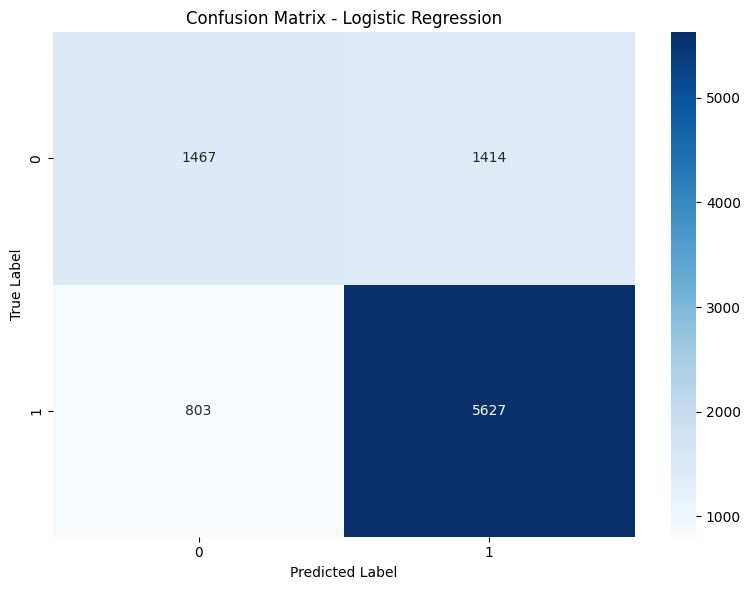

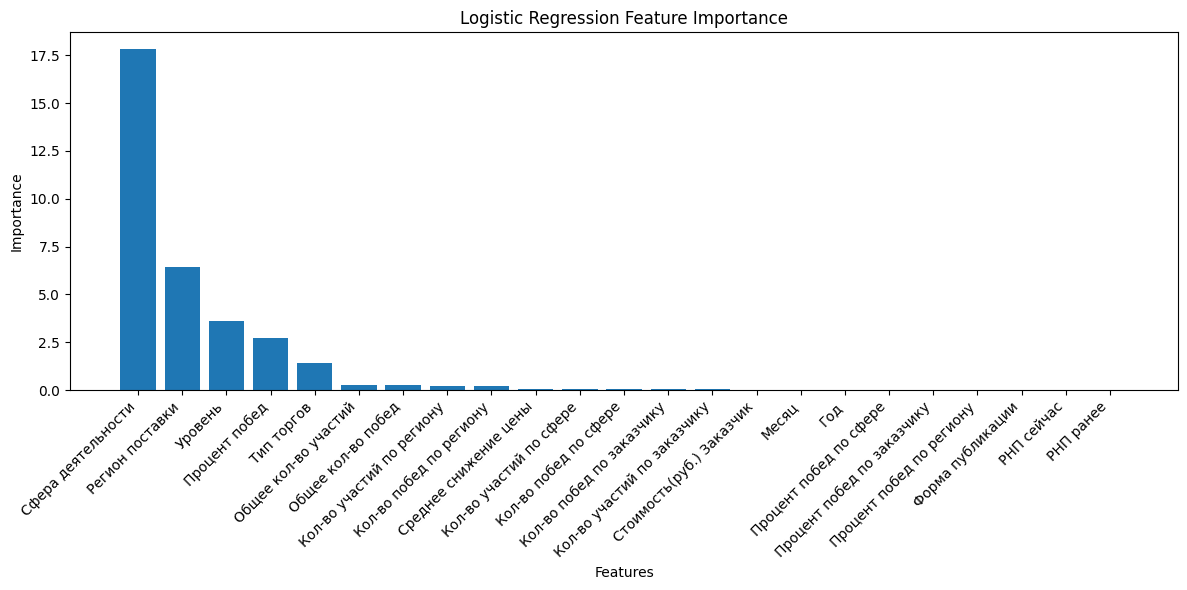


Важность признаков:
                        feature  importance
18           Сфера деятельности   17.810293
17              Регион поставки    6.442551
16                      Уровень    3.616714
0                 Процент побед    2.715282
20                   Тип торгов    1.412556
10         Общее кол-во участий    0.278940
11           Общее кол-во побед    0.278940
1     Кол-во участий по региону    0.197442
2       Кол-во побед по региону    0.197442
12        Среднее снижение цены    0.073492
7       Кол-во участий по сфере    0.072342
8         Кол-во побед по сфере    0.072342
5     Кол-во побед по заказчику    0.058757
4   Кол-во участий по заказчику    0.058757
13     Стоимость(руб.) Заказчик    0.025919
15                        Месяц    0.022504
14                          Год    0.000913
9        Процент побед по сфере    0.000000
6    Процент побед по заказчику    0.000000
3      Процент побед по региону    0.000000
19             Форма публикации    0.000000
21         

In [6]:
y_pred_proba = log_reg.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
evaluate_model("Logistic Regression", y_test, y_pred, y_pred_proba)

importance_df = get_feature_importance(
    log_reg.model.best_estimator_.named_steps['classifier'],
    numerical_features,
    time_features,
    categorical_features,
    log_reg.model.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
)
plot_feature_importance(importance_df, "Logistic Regression Feature Importance")

In [ ]:
for nb_type in ['gaussian', 'bernoulli']:
    nb = NaiveBayesModel(numerical_features, categorical_features, time_features, nb_type=nb_type)
    nb.create_pipeline(categorical_encoder).train(X_train, y_train)
    roc_auc = nb.evaluate(X_test, y_test)
    print(f"{nb_type.capitalize()} Naive Bayes ROC-AUC: {roc_auc:.4f}")

Gaussian Naive Bayes ROC-AUC: 0.7994
Bernoulli Naive Bayes ROC-AUC: 0.8913


Naive Bayes Metrics:
Accuracy: 0.6906
Precision: 0.6906
Recall: 1.0
F1-Score: 0.817
ROC-AUC: 0.8913

Confusion Matrix:


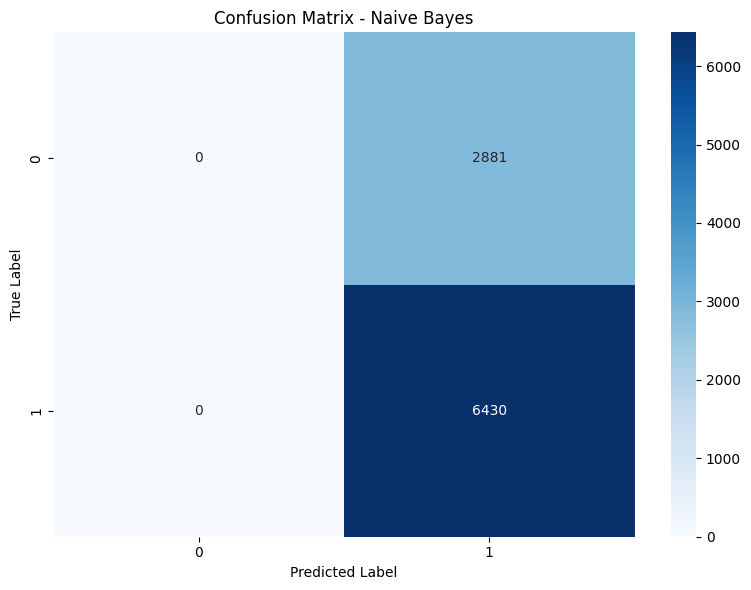


Feature importance недоступна для Naive Bayes моделей


In [131]:
y_pred_proba = nb.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
evaluate_model("Naive Bayes", y_test, y_pred, y_pred_proba)

print("\nFeature importance недоступна для Naive Bayes моделей")

In [125]:
rf = RandomForestModel(numerical_features, categorical_features, time_features)
rf.create_pipeline(categorical_encoder).train(X_train, y_train)

print("Random Forest:")
print(f"Лучшие параметры: {rf.get_best_params()}")
print(f"ROC-AUC на тестовой выборке: {rf.evaluate(X_test, y_test):.4f}")

Random Forest:
Лучшие параметры: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 300}
ROC-AUC на тестовой выборке: 0.8814


Random Forest Metrics:
Accuracy: 0.6911
Precision: 0.6916
Recall: 0.9977
F1-Score: 0.8169
ROC-AUC: 0.8814

Confusion Matrix:


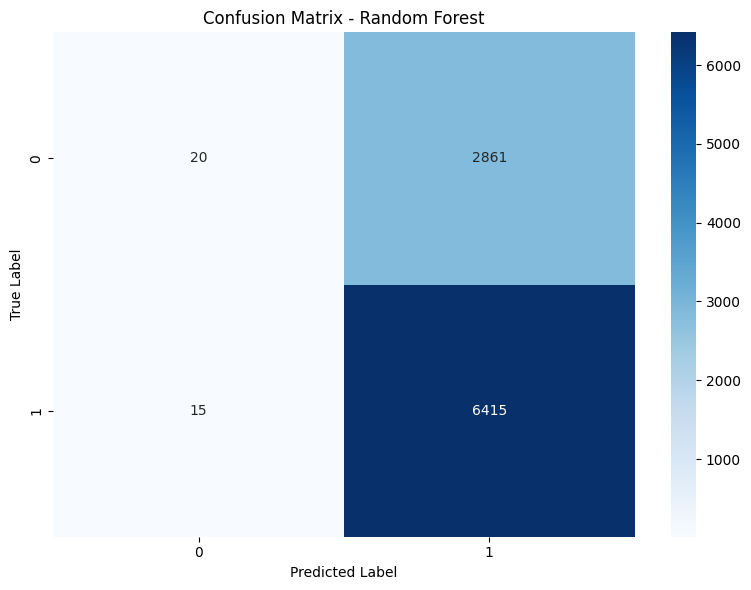

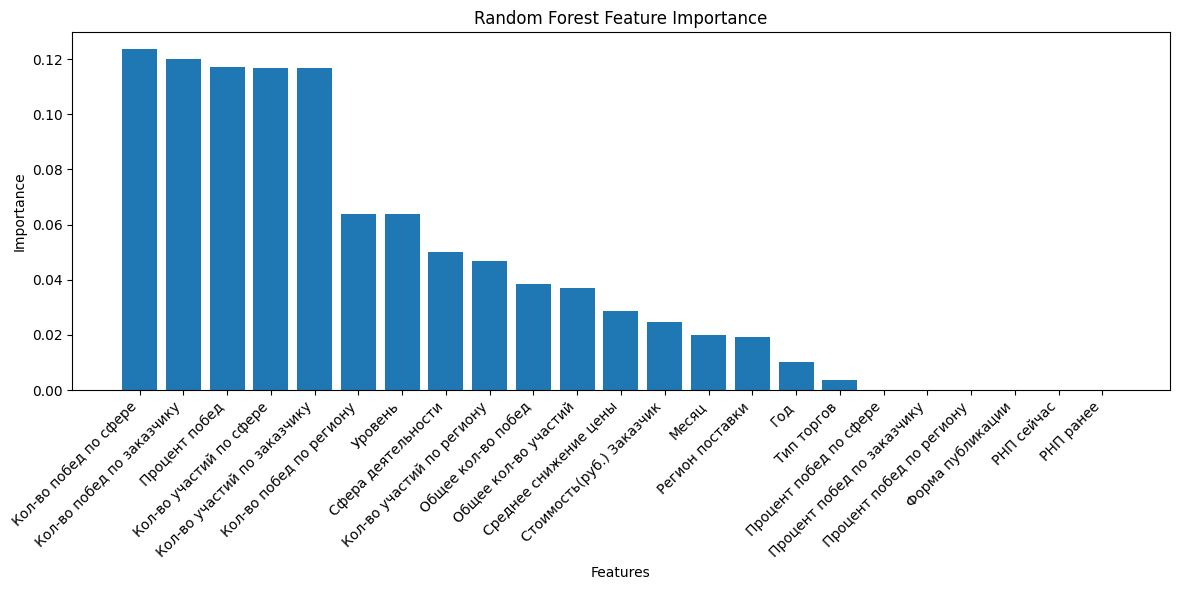


Важность признаков:
                        feature  importance
8         Кол-во побед по сфере    0.123497
5     Кол-во побед по заказчику    0.119866
0                 Процент побед    0.117162
7       Кол-во участий по сфере    0.116704
4   Кол-во участий по заказчику    0.116594
2       Кол-во побед по региону    0.063864
16                      Уровень    0.063745
18           Сфера деятельности    0.050182
1     Кол-во участий по региону    0.046934
11           Общее кол-во побед    0.038384
10         Общее кол-во участий    0.036856
12        Среднее снижение цены    0.028576
13     Стоимость(руб.) Заказчик    0.024562
15                        Месяц    0.020052
17              Регион поставки    0.019201
14                          Год    0.010164
20                   Тип торгов    0.003657
9        Процент побед по сфере    0.000000
6    Процент побед по заказчику    0.000000
3      Процент побед по региону    0.000000
19             Форма публикации    0.000000
21         

In [132]:
y_pred_proba = rf.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
evaluate_model("Random Forest", y_test, y_pred, y_pred_proba)

importance_df = get_feature_importance(
    rf.model.best_estimator_.named_steps['classifier'],
    numerical_features,
    time_features,
    categorical_features,
    rf.model.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
)
plot_feature_importance(importance_df, "Random Forest Feature Importance")

In [78]:
dt = DecisionTreeModel(numerical_features, categorical_features, time_features)
dt.create_pipeline(categorical_encoder).train(X_train, y_train)  # Train the Decision Tree

print("Decision Tree:")
print(f"Best parameters: {dt.get_best_params()}")
print(f"ROC-AUC on the test set: {dt.evaluate(X_test, y_test):.4f}")

Decision Tree:
Best parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 7}
ROC-AUC on the test set: 0.8785


Decision Tree Metrics:
Accuracy: 0.8352
Precision: 0.9951
Recall: 0.7652
F1-Score: 0.8651
ROC-AUC: 0.8785

Confusion Matrix:


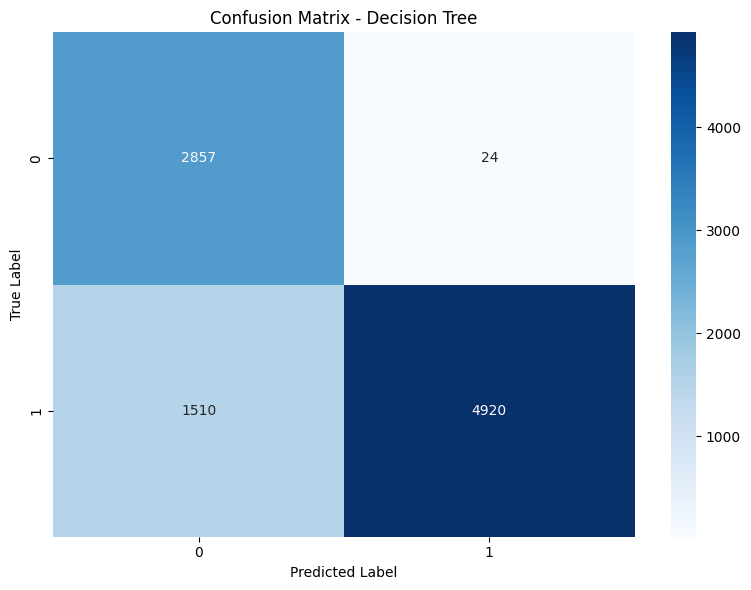

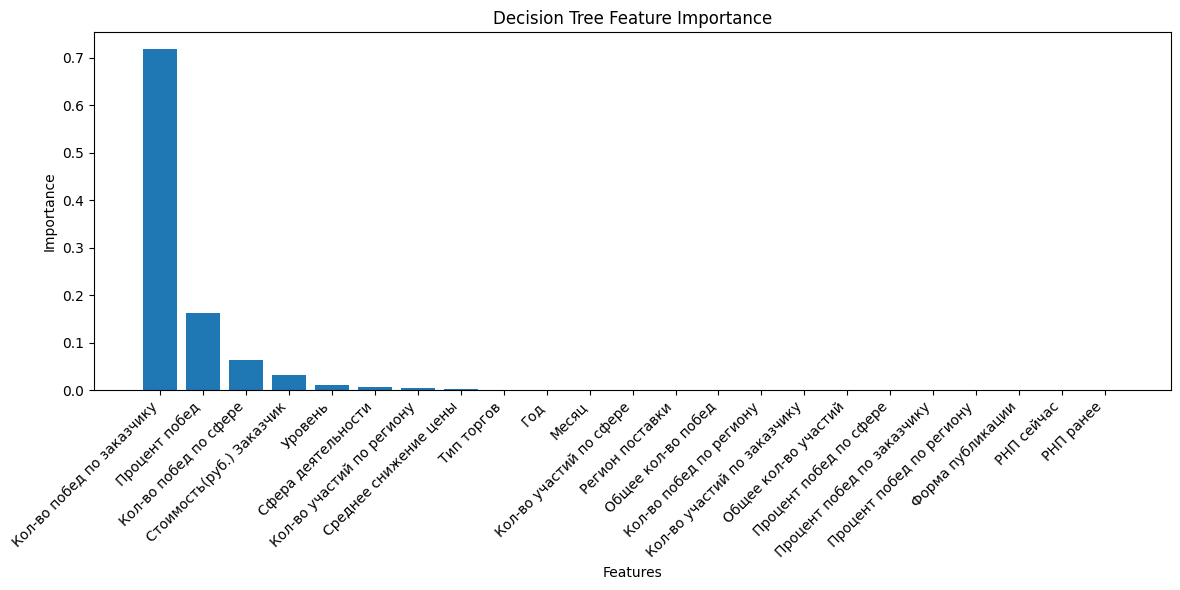


Важность признаков:
                        feature    importance
5     Кол-во побед по заказчику  7.174138e-01
0                 Процент побед  1.614616e-01
8         Кол-во побед по сфере  6.379686e-02
13     Стоимость(руб.) Заказчик  3.108589e-02
16                      Уровень  1.139384e-02
18           Сфера деятельности  5.755756e-03
1     Кол-во участий по региону  4.771425e-03
12        Среднее снижение цены  2.284675e-03
20                   Тип торгов  4.156953e-04
14                          Год  3.307247e-04
15                        Месяц  3.135628e-04
7       Кол-во участий по сфере  2.548047e-04
17              Регион поставки  2.310022e-04
11           Общее кол-во побед  2.301879e-04
2       Кол-во побед по региону  2.051667e-04
4   Кол-во участий по заказчику  5.501870e-05
10         Общее кол-во участий  1.680634e-18
9        Процент побед по сфере  0.000000e+00
6    Процент побед по заказчику  0.000000e+00
3      Процент побед по региону  0.000000e+00
19           

In [133]:
y_pred_proba = dt.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
evaluate_model("Decision Tree", y_test, y_pred, y_pred_proba)

importance_df = get_feature_importance(
    dt.model.best_estimator_.named_steps['classifier'],
    numerical_features,
    time_features,
    categorical_features,
    dt.model.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
)
plot_feature_importance(importance_df, "Decision Tree Feature Importance")

In [7]:
xgb_model = XGBoostModel(numerical_features, categorical_features, time_features)
xgb_model.create_pipeline(categorical_encoder).train(X_train, y_train)

print("XGBoost:")
print(f"Лучшие параметры: {xgb_model.get_best_params()}")
print(f"ROC-AUC на тестовой выборке: {xgb_model.evaluate(X_test, y_test):.4f}")

XGBoost:
Лучшие параметры: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
ROC-AUC на тестовой выборке: 0.8837



XGBoost Metrics:
Accuracy: 0.701
Precision: 0.7009
Recall: 0.989
F1-Score: 0.8204
ROC-AUC: 0.8837

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.06      0.11      2881
           1       0.70      0.99      0.82      6430

    accuracy                           0.70      9311
   macro avg       0.70      0.52      0.46      9311
weighted avg       0.70      0.70      0.60      9311

Confusion Matrix:
[[ 168 2713]
 [  71 6359]]


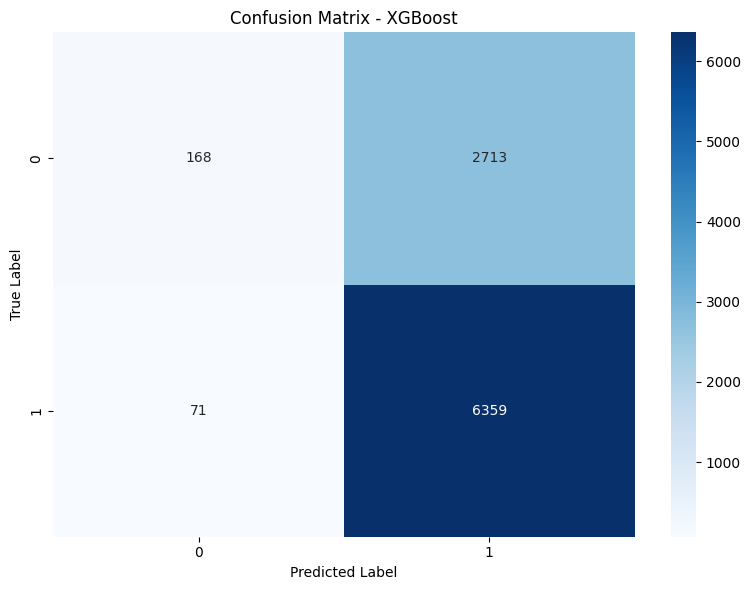

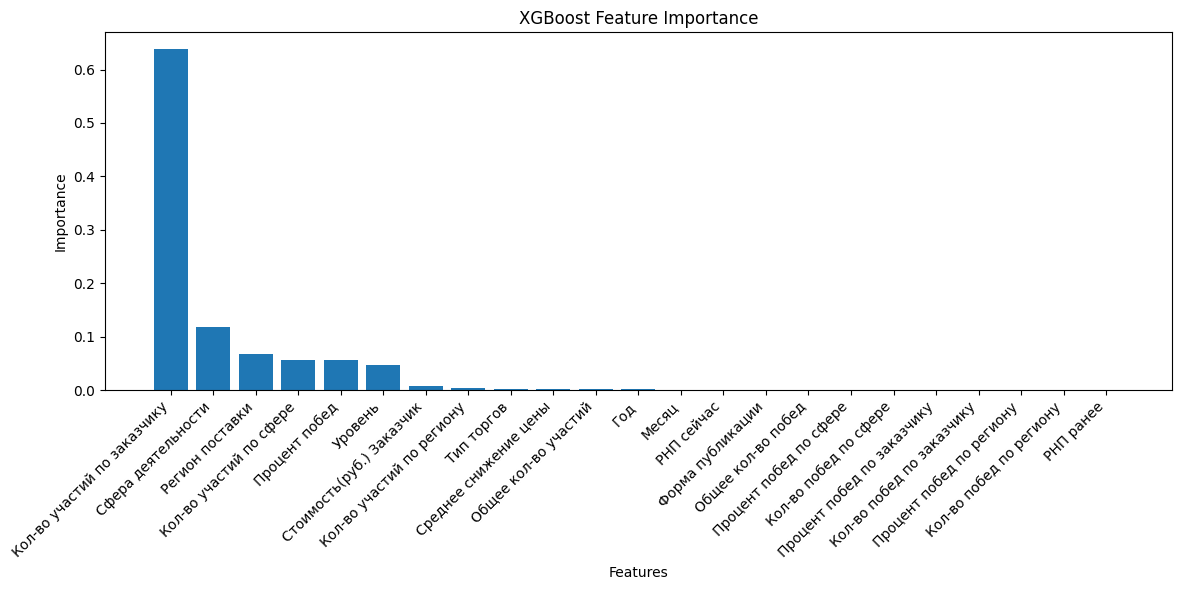


Важность признаков:
                        feature  importance
4   Кол-во участий по заказчику    0.637793
18           Сфера деятельности    0.117510
17              Регион поставки    0.066959
7       Кол-во участий по сфере    0.057097
0                 Процент побед    0.056613
16                      Уровень    0.046327
13     Стоимость(руб.) Заказчик    0.007034
1     Кол-во участий по региону    0.003142
20                   Тип торгов    0.002775
12        Среднее снижение цены    0.001792
10         Общее кол-во участий    0.001186
14                          Год    0.001163
15                        Месяц    0.000610
21                   РНП сейчас    0.000000
19             Форма публикации    0.000000
11           Общее кол-во побед    0.000000
9        Процент побед по сфере    0.000000
8         Кол-во побед по сфере    0.000000
6    Процент побед по заказчику    0.000000
5     Кол-во побед по заказчику    0.000000
3      Процент побед по региону    0.000000
2       Кол

In [9]:
y_pred_proba = xgb_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
evaluate_model("XGBoost", y_test, y_pred, y_pred_proba)

importance_df = get_feature_importance(
    xgb_model.model.best_estimator_.named_steps['classifier'],
    numerical_features,
    time_features,
    categorical_features,
    xgb_model.model.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
)
plot_feature_importance(importance_df, "XGBoost Feature Importance")

In [ ]:
adaboost_model = AdaBoostModel(numerical_features, categorical_features, time_features)
adaboost_model.create_pipeline().train(X_train, y_train)

score = adaboost_model.evaluate(X_test, y_test)
print(f"ROC-AUC на тестовой выборке: {score:.4f}")

best_params = adaboost_model.get_best_params()
print("Лучшие параметры:", best_params)

ROC-AUC на тестовой выборке: 0.8776
Лучшие параметры: {'classifier__estimator__max_depth': 3, 'classifier__learning_rate': 1.0, 'classifier__n_estimators': 200}


AdaBoost Metrics:
Accuracy: 0.6906
Precision: 0.6907
Recall: 0.9997
F1-Score: 0.8169
ROC-AUC: 0.8776

Confusion Matrix:


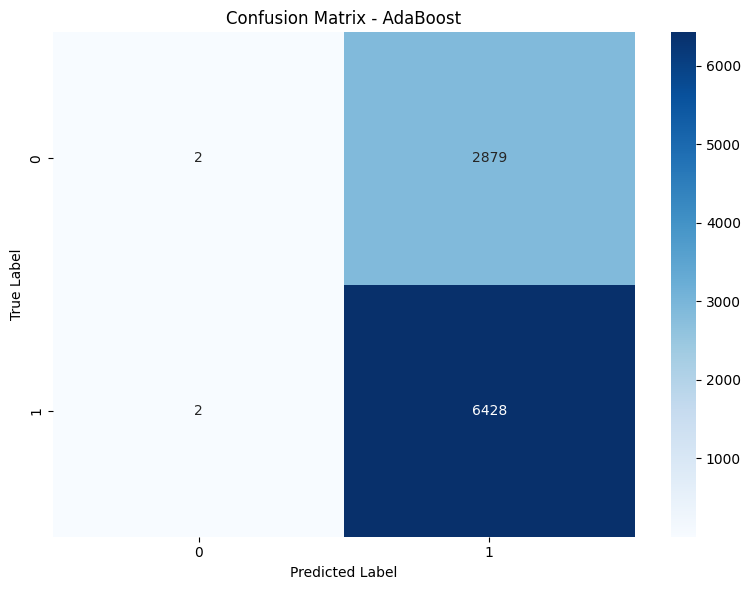

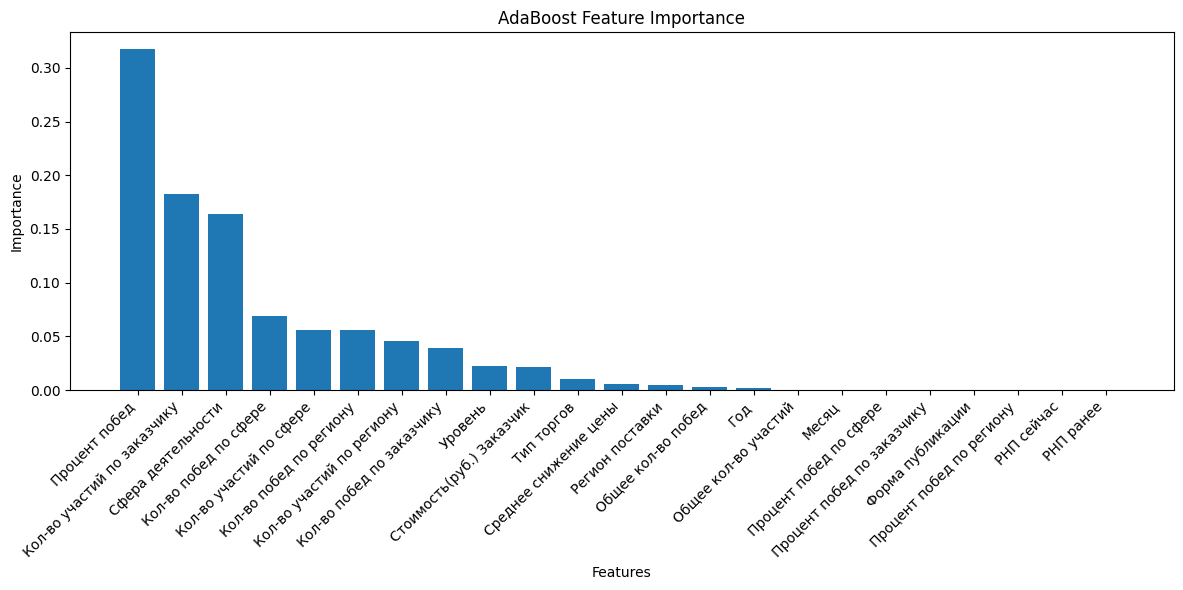


Важность признаков:
                        feature    importance
0                 Процент побед  3.172017e-01
4   Кол-во участий по заказчику  1.826990e-01
18           Сфера деятельности  1.640932e-01
8         Кол-во побед по сфере  6.925273e-02
7       Кол-во участий по сфере  5.587564e-02
2       Кол-во побед по региону  5.550988e-02
1     Кол-во участий по региону  4.577467e-02
5     Кол-во побед по заказчику  3.907937e-02
16                      Уровень  2.252865e-02
13     Стоимость(руб.) Заказчик  2.149897e-02
20                   Тип торгов  1.079271e-02
12        Среднее снижение цены  5.306098e-03
17              Регион поставки  4.984068e-03
11           Общее кол-во побед  3.198533e-03
14                          Год  1.642624e-03
10         Общее кол-во участий  5.621925e-04
15                        Месяц  1.307194e-14
9        Процент побед по сфере  0.000000e+00
6    Процент побед по заказчику  0.000000e+00
19             Форма публикации  0.000000e+00
3      Процен

In [135]:
y_pred_proba = adaboost_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
evaluate_model("AdaBoost", y_test, y_pred, y_pred_proba)

importance_df = get_feature_importance(
    adaboost_model.model.best_estimator_.named_steps['classifier'],
    numerical_features,
    time_features,
    categorical_features,
    adaboost_model.model.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
)
plot_feature_importance(importance_df, "AdaBoost Feature Importance")